# QUESTION:1

In [19]:
#STEP: 1,2,3
import pandas as pd

user = pd.read_csv(r'C:\Users\LENOVO\Downloads/user.csv',sep=',')
user.head()




,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Step 4. Discover what is the mean age per occupation

In [21]:
user[['occupation','age']].groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [23]:
user.head()
df = user[['gender','occupation']]
male = df.loc[df['gender'] == 'M']
total = df.groupby('occupation').count()
male = male.groupby('occupation').count()
ratio = male / total
ratio.sort_values(by='gender', ascending=False)

,gender
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


# Step 6. For each occupation, calculate the minimum and maximum ages

In [25]:
user.head()
df = user[['age','occupation']]
df.groupby('occupation').min()


,age
occupation,
administrator,21
artist,19
doctor,28
educator,23
engineer,22
entertainment,15
executive,22
healthcare,22
homemaker,20


In [26]:
df.groupby('occupation').max()

,age
occupation,
administrator,70
artist,48
doctor,64
educator,63
engineer,70
entertainment,50
executive,69
healthcare,62
homemaker,50


# Step 7. For each combination of occupation and sex, calculate the mean age

In [28]:
user.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

# Step 8. For each occupation present the percentage of women and men

In [31]:
df = user[['occupation','gender']]
df.groupby('occupation').gender.value_counts(normalize=True)*100

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.714286
               F          34.285714
progra

# QUESTION:2

In [34]:
# STEP 1,2,3
import pandas as pd
import numpy as np
euro12 = pd.read_csv(r'C:\Users\LENOVO\Downloads\Euro.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


# Step 4. Select only the Goal column

In [35]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


# Step 5. How many team participated in the Euro2012?

In [36]:
len(euro12.Team.unique())

16

# Step 6. What is the number of columns in the dataset?

In [37]:
euro12.shape[1]

35

# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline


In [38]:
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [39]:
discipline.sort_values(['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


# Step 9. Calculate the mean Yellow Cards given per Team

In [40]:
discipline[['Team','Yellow Cards']].groupby('Team').mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


# Step 10. Filter teams that scored more than 6 goals.


In [41]:
data_goals=euro12[euro12['Goals']>=6]
data_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#  11. Select the teams that start with G.

In [42]:

data_goals[data_goals['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17


# Step 12. Select the first 7 columns

In [43]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


# Step 13. Select all columns except the last 3

In [44]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [45]:
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# QUESTION: 3

In [64]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import random

# Step 2. Create 3 differents Series, each of length 100

In [47]:
first = pd.Series(np.random.randint(1,4,100))
second = pd.Series(np.random.randint(1,3,100))
third = pd.Series(np.random.randint(10000,30000,100))

# Step 3. Create a DataFrame by joinning the Series by column

In [48]:
ds = pd.concat([first,second,third],axis=1)
ds

,0,1,2
0,3,1,22766
1,3,1,28781
2,3,1,12679
3,2,1,17820
4,2,2,13220
...,...,...,...
95,1,2,16161
96,2,2,28971
97,3,1,18153
98,1,1,15658


# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [49]:
ds.columns = ['bedrs','bathrs','price_sqr_meter']
ds.head(10)

,bedrs,bathrs,price_sqr_meter
0,3,1,22766
1,3,1,28781
2,3,1,12679
3,2,1,17820
4,2,2,13220
5,2,1,20642
6,3,1,13131
7,1,2,15000
8,3,2,11009
9,3,2,28714


# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [50]:
bigcolumn = pd.concat([first,second,third],axis=0)
bigcolumn

0         3
1         3
2         3
3         2
4         2
      ...  
95    16161
96    28971
97    18153
98    15658
99    15244
Length: 300, dtype: int32

# Step 6. Oops it seems it is going only until index 99. Is it true?

In [51]:
len(bigcolumn)

300

# Step 7. Reindex the DataFrame so it goes from 0 to 299

In [52]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          3
1          3
2          3
3          2
4          2
       ...  
295    16161
296    28971
297    18153
298    15658
299    15244
Length: 300, dtype: int32

# QUESTION: 8

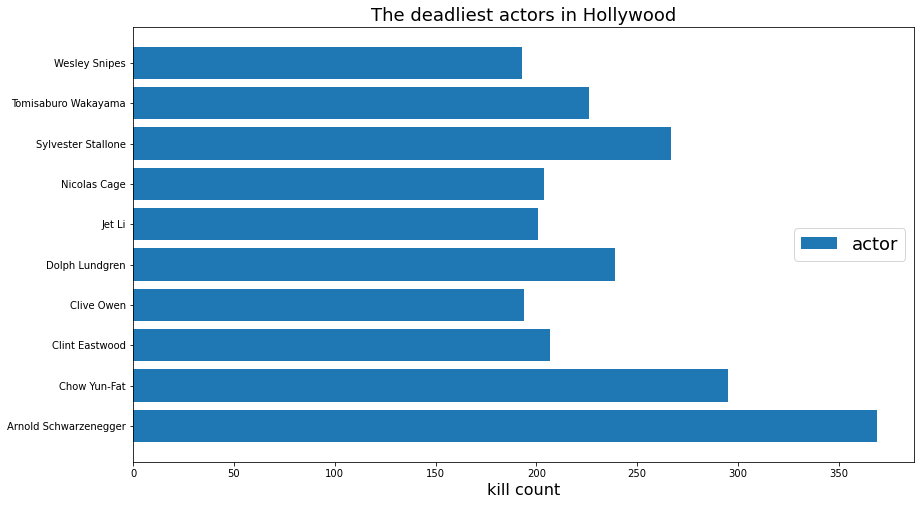

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
deadly_actors = pd.read_csv(r'C:\Users\LENOVO\Downloads\actor_kill_counts.csv')
actors = deadly_actors['Actor']
killCount = deadly_actors['Count']
deadly_actors = plt.figure(figsize=(14,8))
deadly_actors = plt.barh(actors, killCount, label='actor')

deadly_actors = plt.title("The deadliest actors in Hollywood", fontsize=18)
deadly_actors = plt.xlabel("kill count", fontsize=16)
deadly_actors = plt.legend(fontsize = 18, loc = "center right")
deadly_actors

# QUESTION: 9

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

A = pd.read_csv(r'C:\Users\LENOVO\Downloads\roman-emperor-reigns.csv')
new_A = A.groupby("Cause_of_Death")['Emperor'].count()

Text(0.5, 1.0, "Roman Emperor's Cause of Death")

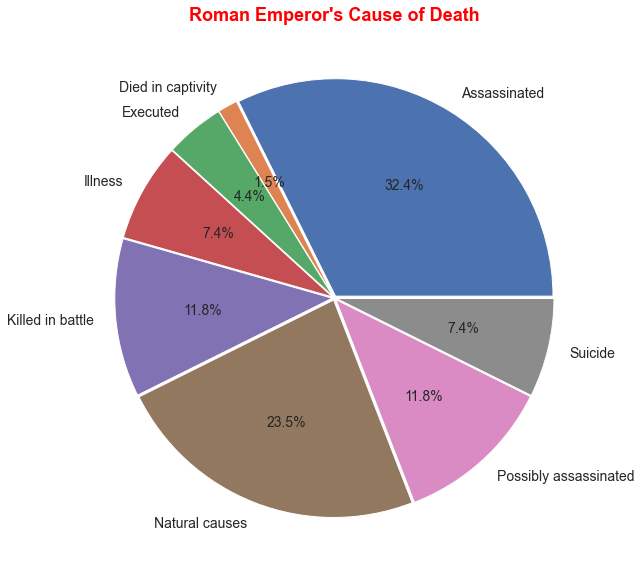

In [68]:
new_A.plot.pie(autopct="%.1f%%", figsize = (10,10) , fontsize = 14, ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperor's Cause of Death", color = 'Red', fontsize = 18, fontweight ='bold')

# QUESTION: 10

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
rev = pd.read_csv(r'C:\Users\LENOVO\Downloads\arcade-revenue-vs-cs-doctorates.csv', index_col=0)

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

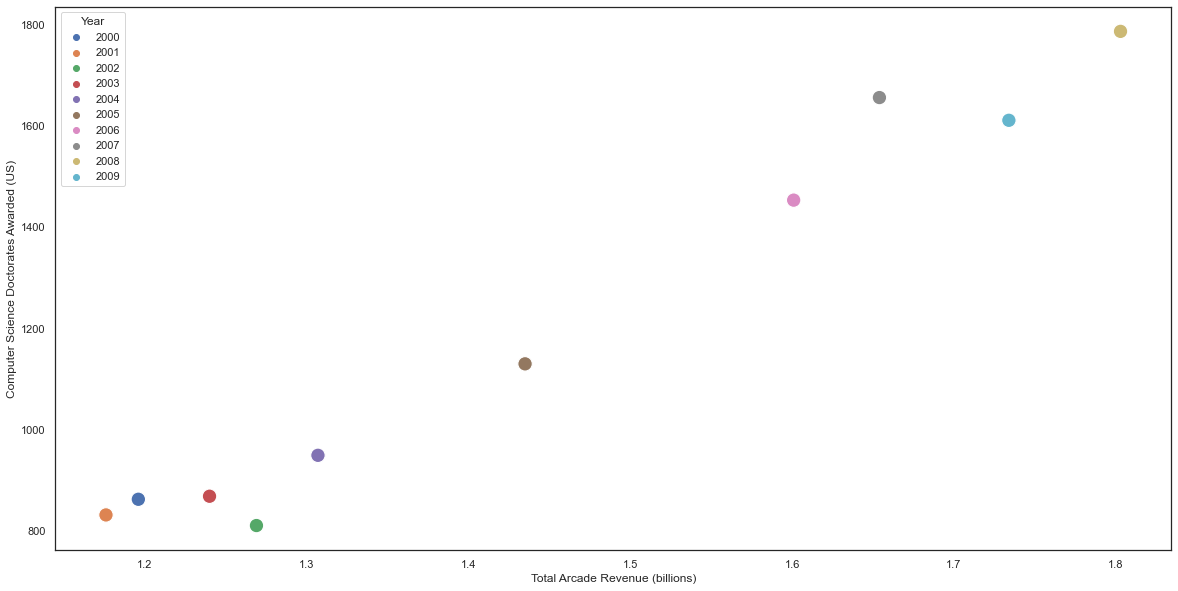

In [84]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme(style="white")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', 
                hue='Year', data=rev, palette="deep",s=210)